In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import time

from sklearn import preprocessing
from sklearn import pipeline
from sklearn import model_selection
from sklearn import compose
from sklearn import set_config

set_config(display='diagram') # Useful for display the pipeline

In [7]:
!ls ../../Datasets/Tabular/titanic/

'Complete solution.ipynb'   gender_submission.csv   test.csv   train.csv


In [19]:
# importing the data

path = '../../Datasets/Tabular/titanic/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train.info(), train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
         PassengerId    Survived      Pclass               Name   Sex  \
 count    891.000000  891.000000  891.000000                891   891   
 unique          NaN         NaN         NaN                891     2   
 top             NaN         NaN         NaN  Kassem, Mr. Fared  male   
 freq            NaN         NaN         NaN                  1   577   
 mean     446.000000    0.383838    2.308642                NaN   NaN   
 std      257.353842    0.486592    0.836071                NaN   NaN   
 min        1.000000    0.000000    1.000000                NaN   NaN   
 25%      223.500000    0.000000    2.000000                NaN   NaN   
 50%      446.000000    0.000000    3.000000                NaN   NaN   
 75%      668.500000    1.000000    3.000000                NaN   NaN   
 max      891.000000    1.000000    3.000000                NaN   NaN   
 
                Age       SibSp       Parch Ticket        Fare        Cabin  \
 count   714.000000  891.000000  891

In [21]:
train.isna().sum(), train.isna().sum() / train.shape[0] 

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId    0.000000
 Survived       0.000000
 Pclass         0.000000
 Name           0.000000
 Sex            0.000000
 Age            0.198653
 SibSp          0.000000
 Parch          0.000000
 Ticket         0.000000
 Fare           0.000000
 Cabin          0.771044
 Embarked       0.002245
 dtype: float64)

             count  percentage
PassengerId      0        0.00
Survived         0        0.00
Pclass           0        0.00
Name             0        0.00
Sex              0        0.00
Age            177       19.87
SibSp            0        0.00
Parch            0        0.00
Ticket           0        0.00
Fare             0        0.00
Cabin          687       77.10
Embarked         2        0.22


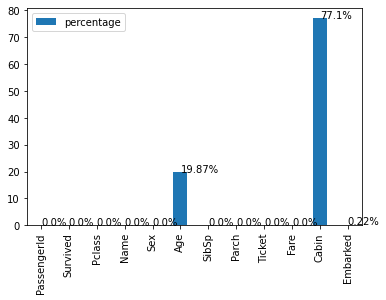

In [22]:
# plotting the missing percentage per column

missing_count = train.isna().sum()
value_count = train.isna().count()
missing_percentage = round(missing_count / value_count * 100, 2)
df_missing = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage})
print(df_missing)

barchart = df_missing.plot.bar(y='percentage')

#  labelling the barchart
for i, percentage in enumerate(missing_percentage):
    barchart.text(i, percentage, str(percentage) + '%')


# Feature Engineering

In [33]:
# Get title from name
get_Title_from_Name = lambda name: name.split(',')[1].split('.')[0].strip()
train['Title']      = train['Name'].map(get_Title_from_Name)
test['Title']       = test['Name'].map(get_Title_from_Name)

title_dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

train['Title']   = train['Title'].map(title_dictionary)
test['Title']    = test['Title'].map(title_dictionary)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [34]:
# check if passenger has cabin

train['has_cabin'] = train['Cabin'].isna().astype(int)
test['has_cabin'] = test['Cabin'].isna().astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [50]:
train['Ticket'].unique().shape

(681,)

In [52]:
#  cleaning ticket column

train['ticket_clean'] = [train['Ticket'][i].replace('/', '').replace('.', '').replace(' ', '') for i in range(train.shape[0])]
test['ticket_clean'] = [test['Ticket'][i].replace('/', '').replace('.', '').replace(' ', '') for i in range(test.shape[0])]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,has_cabin,ticket_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,A521171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,PC17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,STONO23101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,373450


In [123]:
 
def get_groups(df, col):
    groups = np.zeros(train.shape[0])
    group = 1

    for t in df[col].unique():
        found = []
        for i, ticket in enumerate(df[col]):
            if ticket == t:
                found.append(i)
        if len(found) > 1:
            for i in found:
                groups[i] = group
            group += 1
    return groups


train['groups'] = pd.DataFrame(get_groups(train, 'ticket_clean')).astype(int)
test['groups'] = pd.DataFrame(get_groups(test, 'ticket_clean')).astype(int)


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,has_cabin,ticket_clean,groups
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,A521171,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,PC17599,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,STONO23101282,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,113803,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,373450,0


In [ ]:
train.head()